### Credit Card Fraud Detection Model 
#### By : Shivam singh


In [69]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Neccessory Libraries
# 1 . Importing filter warning libraries
import warnings
warnings.filterwarnings(action= 'ignore')

# 2. Importing Data logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
#3. Import OrderDict()
from collections import OrderedDict

In [70]:
# data ingestion

def data_ingestion():
    return pd.read_csv(r'C:\15Days15Project\Credit-Card-Fraud-Detection-Model\data\raw\fraudTest.csv')

In [71]:
df = data_ingestion()
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [72]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [73]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [74]:
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour


In [75]:
df['transaction_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek


In [76]:
df['is_weekend'] = df['transaction_dayofweek'].isin([5, 6]).astype(int)


In [77]:
df['is_night_transaction'] = df['transaction_hour'].between(0, 5).astype(int)


<Axes: title={'center': 'Fraud Rate by Transaction Hour'}, xlabel='transaction_hour'>

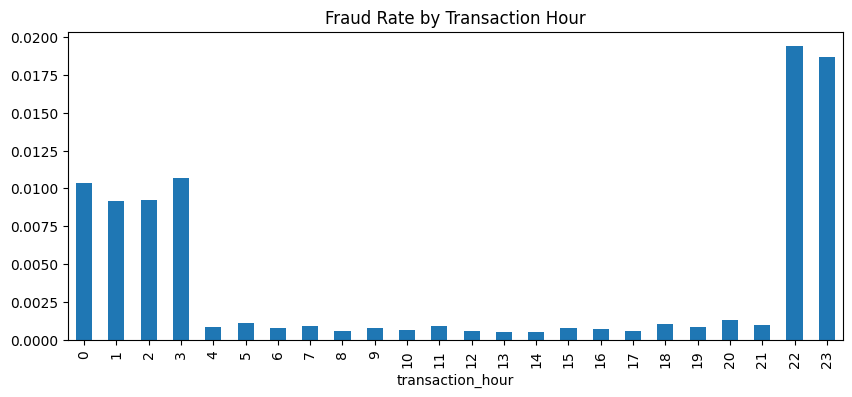

In [78]:
fraud_by_hour = df.groupby('transaction_hour')['is_fraud'].mean()
fraud_by_hour.plot(kind='bar', figsize=(10,4), title='Fraud Rate by Transaction Hour')

<Axes: title={'center': 'Fraud Rate by Day of Week'}, xlabel='transaction_dayofweek'>

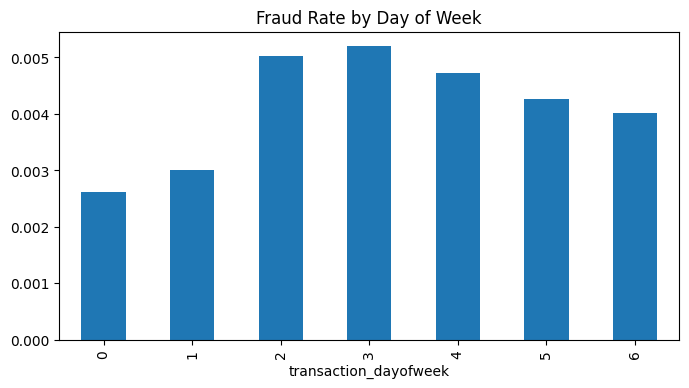

In [79]:
fraud_by_day = df.groupby('transaction_dayofweek')['is_fraud'].mean()

fraud_by_day.plot(kind='bar', figsize=(8,4), title='Fraud Rate by Day of Week')


In [80]:
df.groupby('is_night_transaction')['is_fraud'].mean()


is_night_transaction
0    0.003113
1    0.006921
Name: is_fraud, dtype: float64

In [81]:
df.drop(columns=['trans_date_trans_time'], inplace=True)



In [82]:
df.drop(columns=['Unnamed: 0', 'cc_num' ,'first', 'last','street','trans_num','unix_time'],inplace= True)

In [83]:
# Descriptive stats

def descriptive_stats():
    numerical_col = df.select_dtypes(exclude = 'object').columns
    categorica_col = df.select_dtypes(include = 'object').columns
    num_stats = []
    cat_stats = []
    data_info = []

    for i in numerical_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1 
        LF = Q1 - 1.5*IQR
        UF = Q3 + 1.5*IQR

        outlier_count = len(df[(df[i] < LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) * 100

        numerical_stats = OrderedDict({
            "Feature " : i ,
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)

    for i in categorica_col:
        categorical_stats = OrderedDict({
            "Feature" : i , 
            "Unquie count" : df[i].nunique(),
            "Value count" : df[i].value_counts(),
            "mode" : df[i].mode()
        })
        cat_stats.append(categorical_stats)
    categorical_stats_report = pd.DataFrame(cat_stats)


    for i in df.columns : 
        data1 = OrderedDict({
            "Feature" : i ,
            "Missing value" : df[i].isnull().sum(),
            "Unqiue value" : df[i].nunique(),
            "value count " : df[i].value_counts().to_dict()
        })
        data_info.append(data1)
    data_info_report = pd.DataFrame(data_info)

    return categorical_stats_report,numerical_stats_report,data_info_report

categorical_stats_report,numerical_stats_report,data_info_report = descriptive_stats()

In [84]:
#Numerical Stats
numerical_stats_report

,Feature,Q1,Q3,IQR,LF,UF,Mean,Median,Min,Max,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,amt,9.630000,83.010000,73.380000,-100.440000,193.080000,69.392810,47.290000,1.000000,2.276811e+04,27778,4.998569,156.745941,2.456929e+04,37.134077,3247.084023
1,zip,26292.000000,72011.000000,45719.000000,-42286.500000,140589.500000,48842.628015,48174.000000,1257.000000,9.992100e+04,0,0.000000,26855.283328,7.212062e+08,0.077246,-1.095128
2,lat,34.668900,41.894800,7.225900,23.830050,52.733650,38.543253,39.371600,20.027100,6.568990e+01,1933,0.347838,5.061336,2.561712e+01,-0.206038,0.739401
3,long,-96.798000,-80.175200,16.622800,-121.732200,-55.241000,-90.231325,-87.476900,-165.672300,-6.795030e+01,21104,3.797603,13.721780,1.882872e+02,-1.139416,1.794261
4,city_pop,741.000000,19685.000000,18944.000000,-27675.000000,48101.000000,88221.887918,2408.000000,23.000000,2.906700e+06,104151,18.741666,300390.892061,9.023469e+10,5.583415,37.470475
5,merch_lat,34.755302,41.954163,7.198861,23.957009,52.752455,38.542798,39.376593,19.027422,6.667930e+01,2090,0.376089,5.095829,2.596748e+01,-0.202626,0.722898
6,merch_long,-96.905129,-80.264637,16.640492,-121.865868,-55.303898,-90.231380,-87.445204,-166.671575,-6.695203e+01,17926,3.225731,13.733071,1.885972e+02,-1.136810,1.790573
7,is_fraud,0.000000,0.000000,0.000000,0.000000,0.000000,0.003860,0.000000,0.000000,1.000000e+00,2145,0.385986,0.062008,3.844973e-03,16.002553,254.082629
8,transaction_hour,7.000000,19.000000,12.000000,-11.000000,37.000000,12.809062,14.000000,0.000000,2.300000e+01,0,0.000000,6.810924,4.638868e+01,-0.284805,-1.074857
9,transaction_dayofweek,1.000000,5.000000,4.000000,-5.000000,11.000000,2.726779,2.000000,0.000000,6.000000e+00,0,0.000000,2.178681,4.746652e+00,0.209789,-1.412727


In [85]:
# Categorical stats
categorical_stats_report

,Feature,Unquie count,Value count,mode
0,merchant,693,merchant fraud_Kilback LLC ...,"0 fraud_Kilback LLC Name: merchant, dtype: ..."
1,category,14,category gas_transport 56370 grocery_pos ...,"0 gas_transport Name: category, dtype: object"
2,gender,2,"gender F 304886 M 250833 Name: count, dt...","0 F Name: gender, dtype: object"
3,city,849,city Birmingham 2423 Meridian 2229 P...,"0 Birmingham Name: city, dtype: object"
4,state,50,state TX 40393 NY 35918 PA 34326 CA ...,"0 TX Name: state, dtype: object"
5,job,478,job Film/video editor 4119 Exhi...,"0 Film/video editor Name: job, dtype: object"
6,dob,910,dob 1977-03-23 2408 1988-09-15 1951 1981...,"0 1977-03-23 Name: dob, dtype: object"


In [86]:
# Data Info 
data_info_report

,Feature,Missing value,Unqiue value,value count
0,merchant,0,693,"{'fraud_Kilback LLC': 1859, 'fraud_Cormier LLC..."
1,category,0,14,"{'gas_transport': 56370, 'grocery_pos': 52553,..."
2,amt,0,37256,"{1.1: 239, 1.14: 237, 1.08: 229, 1.31: 227, 1...."
3,gender,0,2,"{'F': 304886, 'M': 250833}"
4,city,0,849,"{'Birmingham': 2423, 'Meridian': 2229, 'Phoeni..."
5,state,0,50,"{'TX': 40393, 'NY': 35918, 'PA': 34326, 'CA': ..."
6,zip,0,912,"{82514: 1589, 48088: 1518, 34112: 1495, 16114:..."
7,lat,0,910,"{43.0048: 1589, 42.5164: 1518, 26.1184: 1495, ..."
8,long,0,910,"{-108.8964: 1589, -82.9832: 1518, -81.7361: 14..."
9,city_pop,0,835,"{606: 2553, 1312922: 2222, 1595797: 2182, 241:..."


Descriptive Insights :
1. Data is non-normal Distributed
2. There is no missing value 
3. highest outlier in city_pop which is 18 percent 

#### EDA

In [87]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'transaction_hour', 'transaction_dayofweek', 'is_weekend',
       'is_night_transaction'],
      dtype='object')

<Axes: xlabel='is_fraud', ylabel='count'>

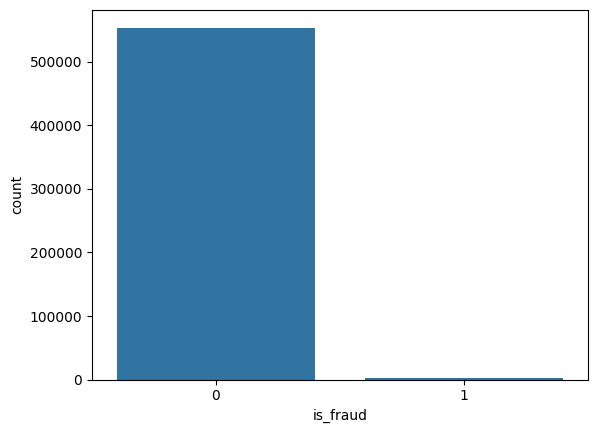

In [88]:
sns.countplot(df , x= 'is_fraud')

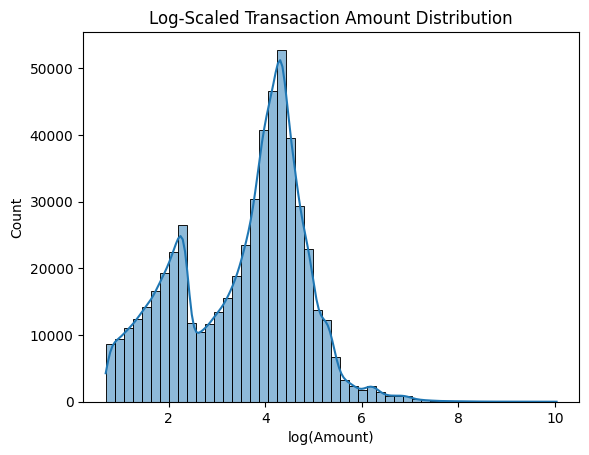

In [89]:
sns.histplot(np.log1p(df['amt']), bins=50, kde=True)
plt.title("Log-Scaled Transaction Amount Distribution")
plt.xlabel("log(Amount)")
plt.show()

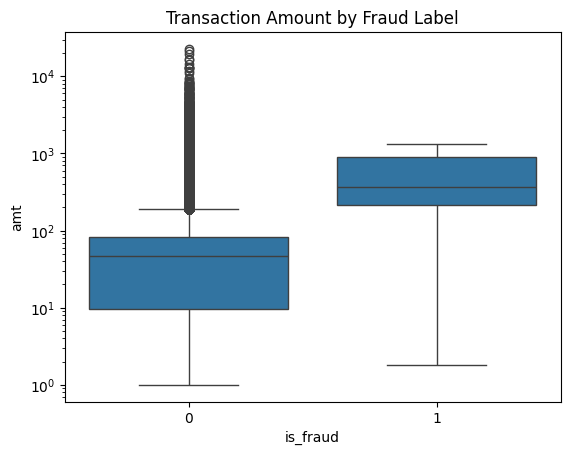

In [90]:
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title("Transaction Amount by Fraud Label")
plt.show()

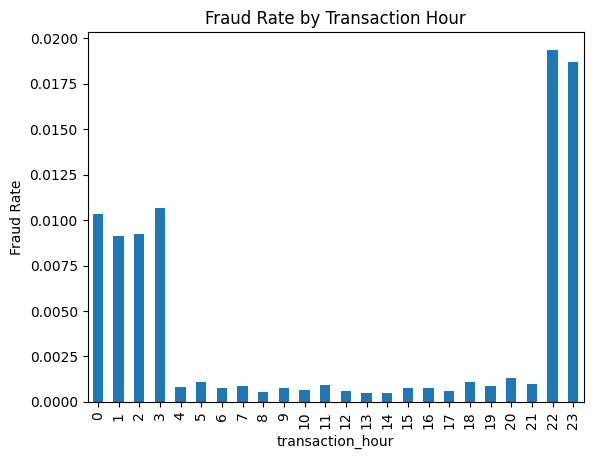

In [91]:
fraud_hour = df.groupby('transaction_hour')['is_fraud'].mean()

fraud_hour.plot(kind='bar')
plt.title("Fraud Rate by Transaction Hour")
plt.ylabel("Fraud Rate")
plt.show()

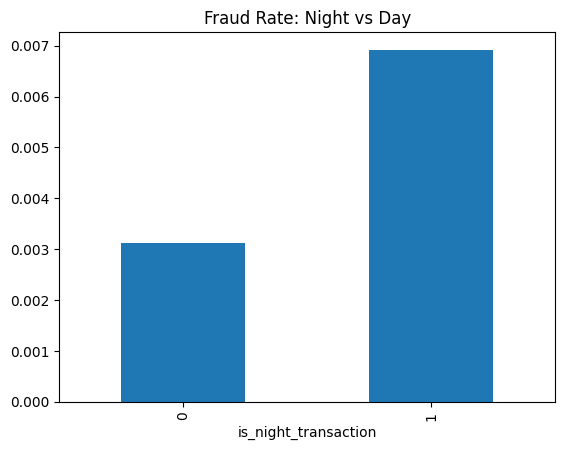

In [92]:
df.groupby('is_night_transaction')['is_fraud'].mean().plot(kind='bar')
plt.title("Fraud Rate: Night vs Day")
plt.show()

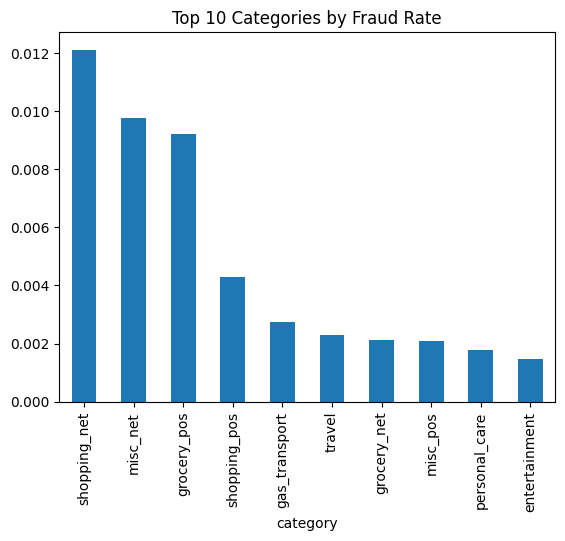

In [93]:
category_fraud = (
    df.groupby('category')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

category_fraud.plot(kind='bar')
plt.title("Top 10 Categories by Fraud Rate")
plt.show()

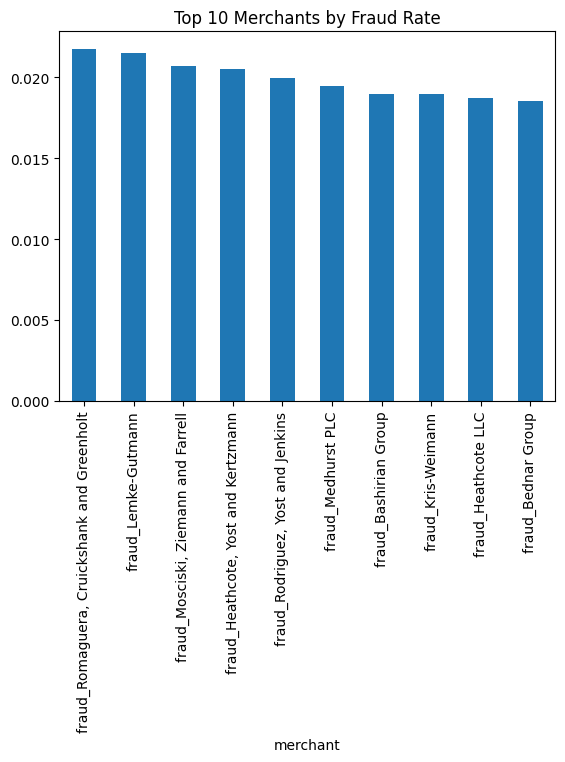

In [94]:
merchant_fraud = (
    df.groupby('merchant')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

merchant_fraud.plot(kind='bar')
plt.title("Top 10 Merchants by Fraud Rate")
plt.show()

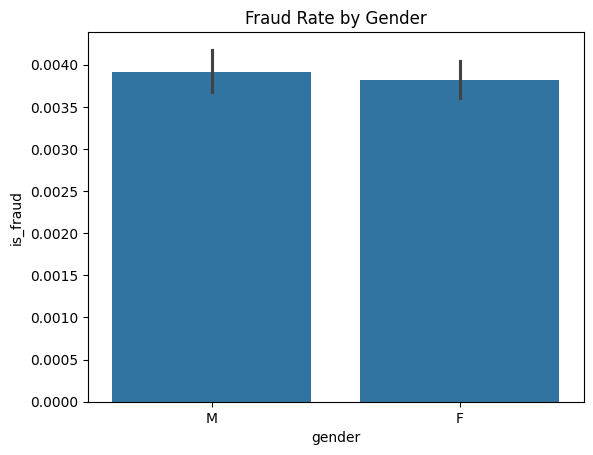

In [95]:
sns.barplot(x='gender', y='is_fraud', data=df)
plt.title("Fraud Rate by Gender")
plt.show()


In [96]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [107]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
numeric_features = [
    'amt', 'city_pop', 
    'transaction_hour'
]

categorical_features = [
    'category', 'merchant', 'gender', 'job', 'state',
]

In [108]:
df.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,transaction_hour,transaction_dayofweek,is_weekend,is_night_transaction
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,12,6,1,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,12,6,1,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,12,6,1,0
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,12,6,1,0
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,12,6,1,0


In [109]:
# preprocessing 
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [110]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [111]:
# logistic Regressor 
log_reg_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [112]:
# Random classifier
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])


In [113]:
# Model train 
log_reg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The

In [114]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n🔹 {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


In [115]:
evaluate_model(log_reg_pipeline, X_test, y_test, "Logistic Regression + SMOTE")
evaluate_model(rf_pipeline, X_test, y_test, "Random Forest + SMOTE")



🔹 Logistic Regression + SMOTE
Confusion Matrix:
[[101511   9204]
 [    85    344]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    110715
           1       0.04      0.80      0.07       429

    accuracy                           0.92    111144
   macro avg       0.52      0.86      0.51    111144
weighted avg       1.00      0.92      0.95    111144

ROC-AUC Score: 0.9446803659240999

🔹 Random Forest + SMOTE
Confusion Matrix:
[[110700     15]
 [   171    258]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.95      0.60      0.74       429

    accuracy                           1.00    111144
   macro avg       0.97      0.80      0.87    111144
weighted avg       1.00      1.00      1.00    111144

ROC-AUC Score: 0.9806299738287274
